In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[keras refrence](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)

**Convolutional Neural Network**

*Importing the libraries*

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np

In [17]:
tf.__version__

'2.15.0'

**Part 1 - Data Preprocessing**

***Creating the Training set***

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/kaggle/input/cat-vs-dog-image-classification-making-prediction/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


***Preprocessing the Test set***

In [19]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/kaggle/input/cat-vs-dog-image-classification-making-prediction/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


**Part 2 - Building the CNN**

**Initialising the CNN**

In [20]:
cnn= tf.keras.models.Sequential()

**Step 1 - Convolution**

In [21]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))

**Step 2 - Pooling**

In [22]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**working visulization**
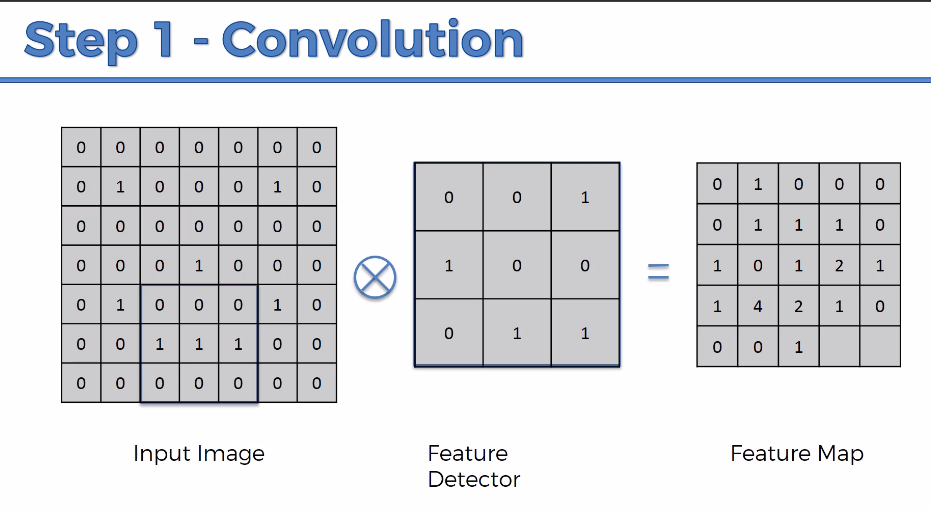
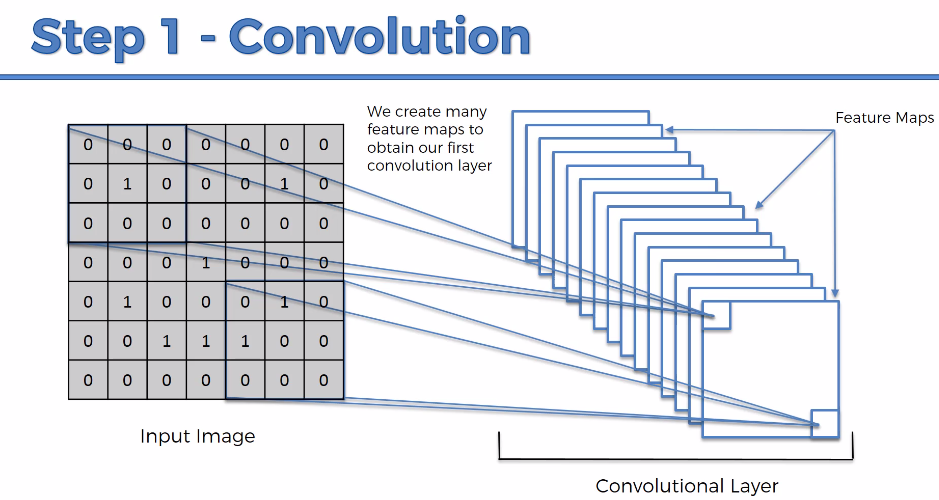
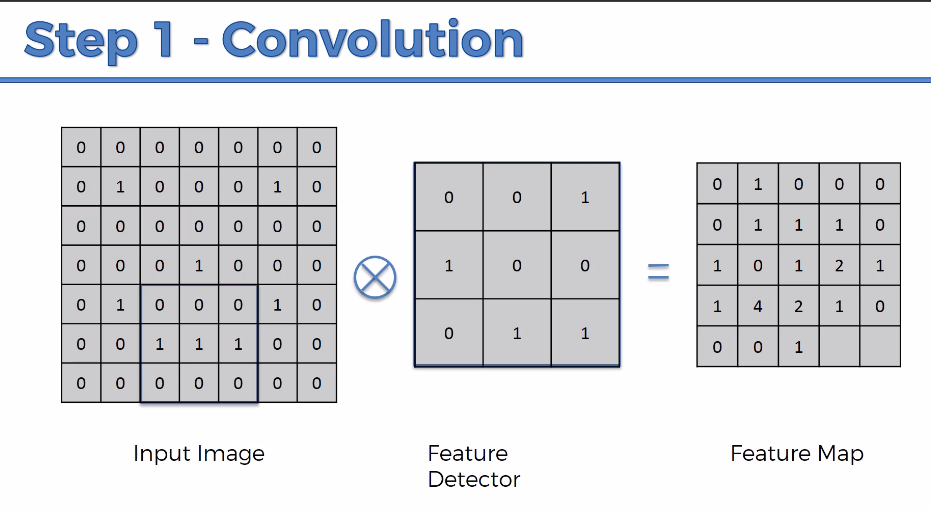
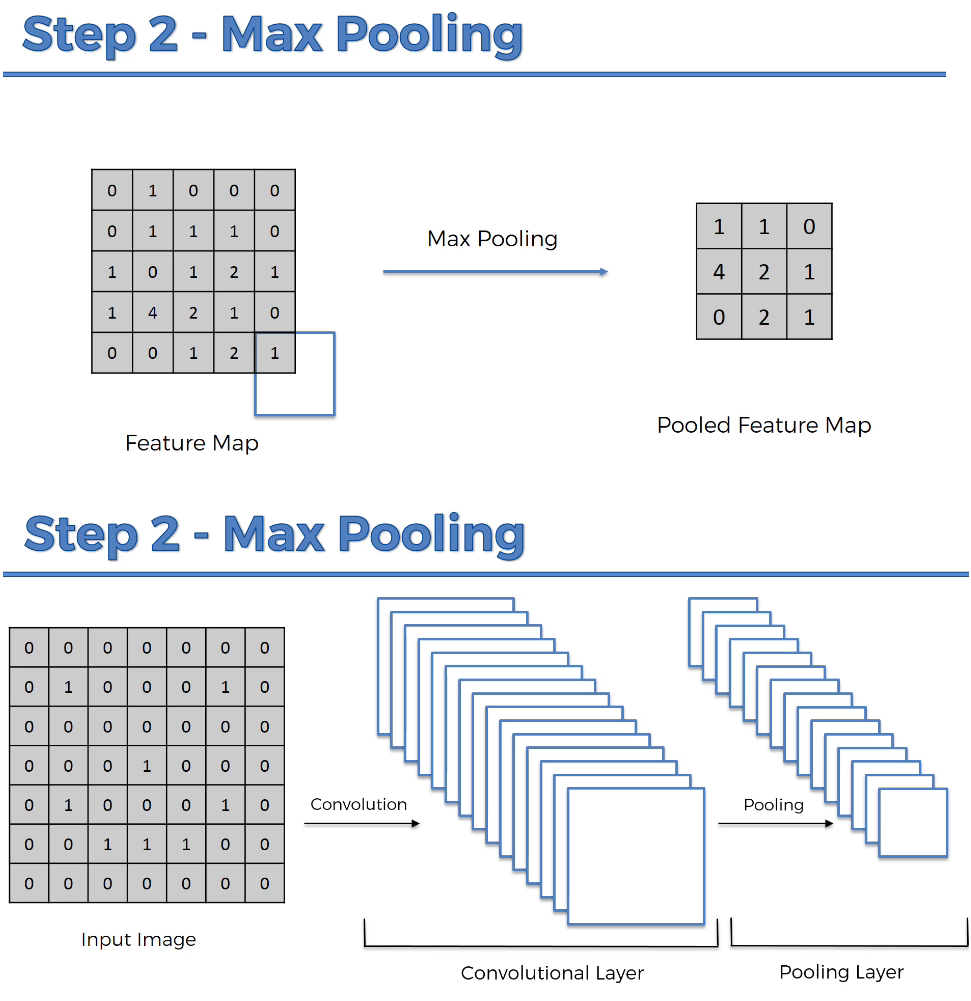


**Adding a second convolutional layer**

In [23]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Step 3 - Flattening**

In [24]:
cnn.add(tf.keras.layers.Flatten())

**Step 4 - Full Connection**

In [25]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

**Step 5 - Output Layer**

In [26]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

****

**Part 3 - Training the CNN**

**Compiling the CNN**

In [27]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Training the CNN on the Training set and evaluating it on the Test set**

In [30]:
cnn.fit(x=training_set, validation_data=test_set, epochs=25)

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/250 ━━━━━━━━━━━━━━━━━━━━ 27:40 7s/step - accuracy: 0.5000 - loss: 0.7100

I0000 00:00:1709382292.934924     552 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1709382292.952741     552 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


243/250 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.5389 - loss: 0.6949

W0000 00:00:1709382339.942789     553 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


250/250 ━━━━━━━━━━━━━━━━━━━━ 64s 230ms/step - accuracy: 0.5397 - loss: 0.6944 - val_accuracy: 0.6350 - val_loss: 0.6348
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 120ms/step - accuracy: 0.6469 - loss: 0.6279 - val_accuracy: 0.7015 - val_loss: 0.5759
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 30s 118ms/step - accuracy: 0.6934 - loss: 0.5784 - val_accuracy: 0.7190 - val_loss: 0.5734
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 120ms/step - accuracy: 0.7346 - loss: 0.5345 - val_accuracy: 0.7320 - val_loss: 0.5437
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 30s 118ms/step - accuracy: 0.7491 - loss: 0.5095 - val_accuracy: 0.7290 - val_loss: 0.5557
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 121ms/step - accuracy: 0.7716 - loss: 0.4783 - val_accuracy: 0.7755 - val_loss: 0.4749
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 30s 117ms/step - accuracy: 0.7800 - loss: 0.4562 - val_accuracy: 0.7695 - val_loss: 0.5048
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 30s 118ms/step - accuracy: 0.7907 - loss: 0.4442 - val

**Part 4 - Making a single prediction**

In [36]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/kaggle/input/cat-vs-dog-image-classification-making-prediction/dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image/255.0)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [37]:
print(prediction)

cat
